In [92]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [93]:
df = pd.read_csv('datasets/C62.csv', header=0)
df

,DienTich,LoaiDat,MatTien
0,167,1_dat_nong_nghiep,15
1,200,2_dat_khong_thoi_han,20
2,40,10_dat_nong_nghiep,40
3,23,15_dat_co_thoi_han,67
4,1000,2_dat_nong_nghiep,90
5,3000,1_dat_khong_thoi_han,45


In [94]:
# Hiển thị 5 dòng đầu tiên
df.head(5)

,DienTich,LoaiDat,MatTien
0,167,1_dat_nong_nghiep,15
1,200,2_dat_khong_thoi_han,20
2,40,10_dat_nong_nghiep,40
3,23,15_dat_co_thoi_han,67
4,1000,2_dat_nong_nghiep,90


In [95]:
# Hiển thị 5 dòng ngẫu nhiên
df.sample(5)

,DienTich,LoaiDat,MatTien
5,3000,1_dat_khong_thoi_han,45
2,40,10_dat_nong_nghiep,40
3,23,15_dat_co_thoi_han,67
0,167,1_dat_nong_nghiep,15
4,1000,2_dat_nong_nghiep,90


In [96]:
# Kích thước df
print(df.size)

18


In [97]:
print(df.shape)

(6, 3)


In [98]:
print('đất nông nghiệp:')
df_nongnghiep = df[df['LoaiDat'].str.contains('dat_nong_nghiep', case=False, na=False)]

đất nông nghiệp:


In [99]:
print('đất không thời hạn:')
df_kothoihan = df[df['LoaiDat'].str.contains('dat_khong_thoi_han', case=False, na=False)]

đất không thời hạn:


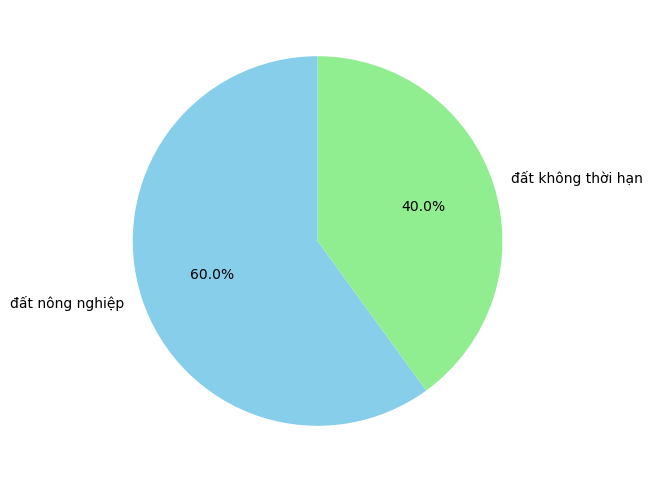

In [100]:
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'lightgreen']
sizes = [
    len(df_nongnghiep),
    len(df_kothoihan)
]

plt.pie(
    sizes, labels=['đất nông nghiệp', 'đất không thời hạn'], colors=colors, 
    autopct='%1.1f%%', startangle=90
)
plt.show()

In [101]:
df_thoihan = df[df['LoaiDat'].str.contains('dat_co_thoi_han', case=False, na=False)].copy()
df_thoihan['ThoiHan'] = df_thoihan['LoaiDat'].str.split('_').str[0].astype(int)

df_thoihan10 = df_thoihan[df_thoihan['ThoiHan'] > 10]

df_thoihan10

,DienTich,LoaiDat,MatTien,ThoiHan
3,23,15_dat_co_thoi_han,67,15


In [102]:
# get year from a string
# Sample DataFrame
data = {'date': ['29/09/2004', '15/06/2010', '01/01/2022']}
ex = pd.DataFrame(data)

# Convert the date column to datetime and extract the year
ex['year'] = pd.to_datetime(ex['date'], format='%d/%m/%Y').dt.year

print(ex)

         date  year
0  29/09/2004  2004
1  15/06/2010  2010
2  01/01/2022  2022


In [103]:
# Chèn cột tiền giá trị lô đất
def tinh_toan(row):
    if 'dat_nong_nghiep' in row['LoaiDat']:
        return row['DienTich'] * 2
    elif 'dat_khong_thoi_han' in row['LoaiDat']:
        return row['DienTich'] * (row['MatTien'] ** 2)
    else:
        return "Không xác định giá trị"

df['GiaTri'] = df.apply(tinh_toan, axis=1)
df

,DienTich,LoaiDat,MatTien,GiaTri
0,167,1_dat_nong_nghiep,15,334
1,200,2_dat_khong_thoi_han,20,80000
2,40,10_dat_nong_nghiep,40,80
3,23,15_dat_co_thoi_han,67,Không xác định giá trị
4,1000,2_dat_nong_nghiep,90,2000
5,3000,1_dat_khong_thoi_han,45,6075000


In [104]:
# chèn cột chuyển đổi cho đất nông nghiệp, các loại khác ghi 'chưa có công văn'
def chuyen_doi(row):
    if 'dat_nong_nghiep' in row['LoaiDat']:
        return row['DienTich'] * 15
    else:
        return 'chưa có công văn'

df['ChuyenDoi'] = df.apply(chuyen_doi, axis=1)
df[df['ChuyenDoi'] != 'chưa có công văn']

,DienTich,LoaiDat,MatTien,GiaTri,ChuyenDoi
0,167,1_dat_nong_nghiep,15,334,2505
2,40,10_dat_nong_nghiep,40,80,600
4,1000,2_dat_nong_nghiep,90,2000,15000


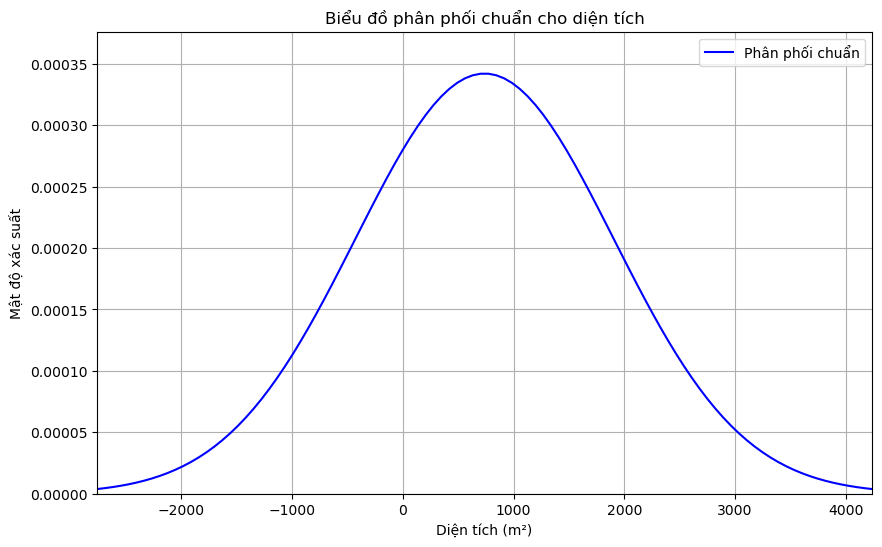

In [105]:
mean = df['DienTich'].mean()
std = df['DienTich'].std()

# Hàm tính mật độ xác suất
def probability_density(x):
    return norm.pdf(x, mean, std)

# Tạo dữ liệu cho biểu đồ
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = probability_density(x)

# Vẽ biểu đồ phân phối chuẩn
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Phân phối chuẩn', color='blue')
plt.title('Biểu đồ phân phối chuẩn cho diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Mật độ xác suất')
plt.xlim([mean - 3 * std, mean + 3 * std])
plt.ylim([0, max(y) * 1.1])
plt.grid()

plt.legend()
plt.show()